## Ch3 exercises

My attempt at Q8, 9, 10, 14 and 15 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math # imports the built-in Python math library for mathematical operations.
import statsmodels.api as sm # statsmodels provides functions for regression analysis, time series analysis, and other statistical models.
import statsmodels.formula.api as smf #  imports the formula API of statsmodels for specifying statistical models using R-style formulas.
from statsmodels.stats.outliers_influence import variance_inflation_factor # the var. function is used to detect multicollinearity in regression models.
from statsmodels.graphics.regressionplots import * #  imports all functions from the statsmodels regressionplots module for plotting regression models.
from sklearn import datasets, linear_model # imports the datasets and linear_model modules from the scikit-learn library for machine learning in Python.

### Q8. Auto dataset

This question involves the use of simple linear regression on the Auto dataset.

In [2]:
# Creating simple linear regression with mpg as the response and horsepower as the predictor

auto = pd.read_csv('data/Auto.csv', header = 0, index_col = 8)

In [3]:
print(auto.shape)

(397, 8)


### Preliminary cleaning of auto dataset 

- Removing "?" values from the horsepower column (only results in the loss of 5 observations)
- Converting horsepower values from factors to integers so that horsepower appears as a single variable with different values rather than multiple sub-variables. Easier and better to model with for these questions

In [4]:
# replacing '?' values with NaN
auto.replace('?', np.nan, inplace=True)

# dropping rows with NaN values
auto.dropna(inplace=True)

In [5]:
print(auto.shape) # to confirm we've dropped the rows with NaN values

(392, 8)


In [10]:
# converting the values in the 'horsepower' column from factor to integer
auto['horsepower'] = auto['horsepower'].astype(int)

In [11]:
list(auto) # checking columns

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin']

In [12]:
auto.head() # checking the dataframe 

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


### Ready to start the questions... 

In [13]:
lm = smf.ols ('mpg~horsepower', data = auto).fit() # using the statsmodels library to fit a linear regression model

In [14]:
print(lm.summary()) # prints a summary of the linear regression model

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 01 May 2023   Prob (F-statistic):           7.03e-81
Time:                        14:19:15   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

### Notes on model interpretation

#### i. Is there a relationship between the predictor and the response? 
- Yes, there is a negative relationship with a coefficient estimate of -0.1578

#### ii. How strong is the relationship between the predictor and the response?
- Not strong, r-squared is 0.606 which is below what is commongly considered a statistically significant r-squared value (0.7) 
- Before data cleaning (changing 'horsepower' values from factors to integers) the r-squared was 0.795. This would've been considered reasonably strong. However, I think this was wrong as it was before data cleaning. 

#### iii. Is the relationship between the predictor and the response positive or negative?
- Negative, the horsepower coefficient estimate is -0.1578, indicating that for each value increase in horsepower there is a value decrease in mpg.
- Before data cleaning it was difficult to say because there are different negative / positive coefficients for horsepower at different times, e.g. the horsepower T.108 coefficient estimate is -0.5941, indicating a negative relationship. But the horsepower T.110 coefficient estimate is 0.2392 

#### iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?
- (See codeblock below) 
- Predicted mpg at horsepower of 98:  20.25000000000001
- 95% confidence interval: [14.60674507, 25.89325493]

In [16]:
# Not sure why this only works when I put 98 in speechmarks? 

test_value = pd.DataFrame({'horsepower':[98]}) # creating a new dataframe with horsepower set to 98
test_pred = lm.predict(test_value) # using predict method to get the predicted mpg at horsepower of 98
conf_interval = lm.get_prediction(test_value).conf_int() # using the get_prediction method to get the confidence intervals

print('Predicted mpg at horsepower of 98: ', test_pred[0])
print('95% confidence interval:', conf_interval[0])

Predicted mpg at horsepower of 98:  24.467077152512427
95% confidence interval: [23.97307896 24.96107534]


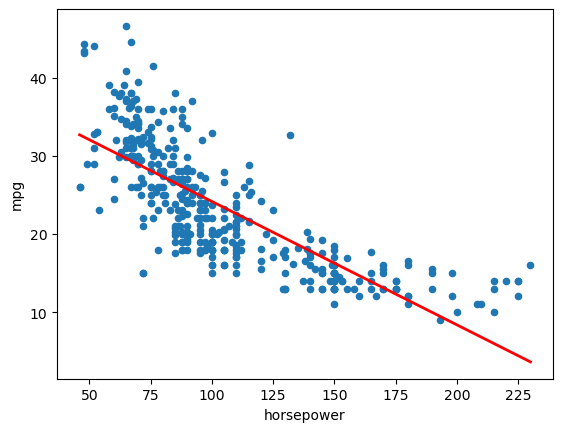

In [19]:
# plotting the fitted line

x_new = pd.DataFrame({'horsepower': [auto.horsepower.min(), auto.horsepower.max()]}) # creates new DataFrame with two rows for min and max value of 'horsepower'
preds = lm.predict(x_new) # predicts linear regression based on min / max 'horsepower' values in the new DataFrame
auto.plot(kind = 'scatter', x = 'horsepower', y = 'mpg') # creating scatterplot from original auto dataframe
plt.plot(x_new['horsepower'].values, preds.values, c = 'red', linewidth = 2) # plotting values from linear regression model
plt.show()

### Notes on interpretation
- The horsepower data points are quite sparce towards the higher values
- This means that the regression line looks like it's not capturing the trend very well for these higher value horsepower data points

### Q9. Auto dataset

This question involves multiple linear regression on the Auto dataset.

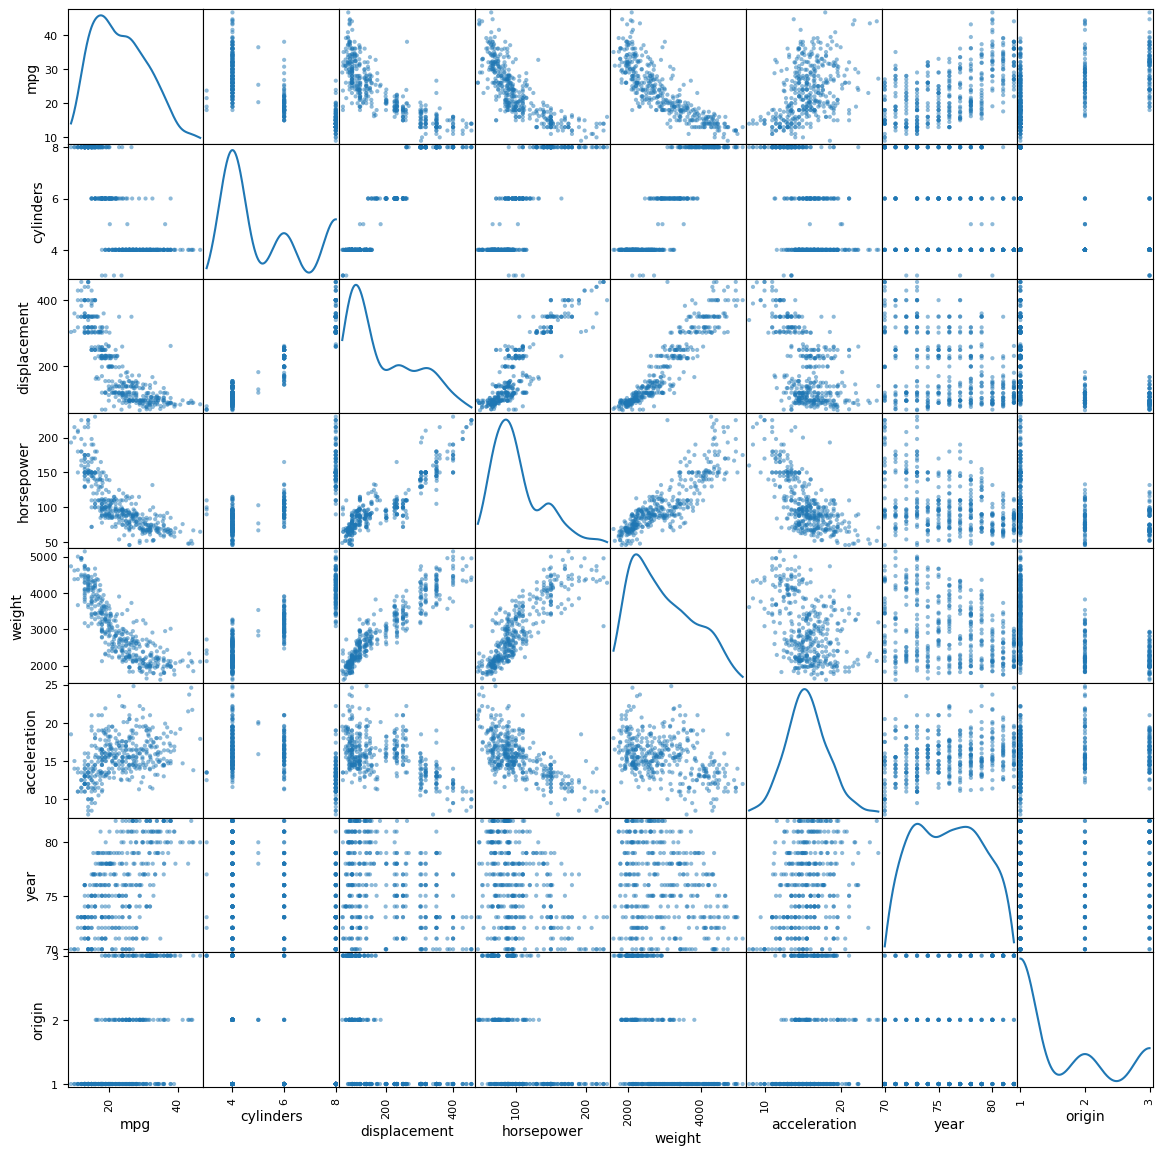

In [20]:
# creating scatterplot matrix with all columns in the auto dataset

pd.plotting.scatter_matrix(auto, diagonal='kde', figsize=(14,14)) # using kde instead of hist to create density plots
plt.show()

In [21]:
# computing matrix correlations between variables to help understand relationships between variable
# correlation matrix calculates the pairwise correlation coefficients between all variables in the dataset...
# ...where each coefficient measures the strength and direction of the linear relationship between two variables.

data = auto.iloc[:, 1:] # dropping the name column by starting at 1, the second column 
corr_matrix = data.corr() # computing correlation matrix 
print(corr_matrix)

              cylinders  displacement  horsepower    weight  acceleration  \
cylinders      1.000000      0.950823    0.842983  0.897527     -0.504683   
displacement   0.950823      1.000000    0.897257  0.932994     -0.543800   
horsepower     0.842983      0.897257    1.000000  0.864538     -0.689196   
weight         0.897527      0.932994    0.864538  1.000000     -0.416839   
acceleration  -0.504683     -0.543800   -0.689196 -0.416839      1.000000   
year          -0.345647     -0.369855   -0.416361 -0.309120      0.290316   
origin        -0.568932     -0.614535   -0.455171 -0.585005      0.212746   

                  year    origin  
cylinders    -0.345647 -0.568932  
displacement -0.369855 -0.614535  
horsepower   -0.416361 -0.455171  
weight       -0.309120 -0.585005  
acceleration  0.290316  0.212746  
year          1.000000  0.181528  
origin        0.181528  1.000000  


### Notes on interpretation
- Appears to be strong relationships between: cylinders and displacement, cylinders and horsepower, cylinders and weight, displacement and horsepower, dispalcement and weight, horsepower and weight
- In summary, these three variables seem to have relationships to one and other: cylinders, displacement, horsepower

In [23]:
# creating multiple linear regression model, excluding name in first column

all_columns = "+".join(auto.columns.difference(["name", "mpg"])) # creating a string of all variable names in auto dataset apart from 'name', using difference method to exclude 'name'
my_formula = "mpg~" + all_columns # creating a formula string, saying we want to predict 'medv' using all other variables
lm = smf.ols(my_formula, data=auto).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 01 May 2023   Prob (F-statistic):          2.04e-139
Time:                        14:49:33   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

### Notes on interpretation

i. Is there a relationship between the predictors and the response?
- Yes, overall the r-squared is 0.821 which indicates that the dependent variable ('mpg') is overall well explained by the group of independent variables in this model

ii. Which predictors appear to have a statistically significant relationship to the response?
- Variables with results that suggest they have a statistically significant relationship to the response are those with p-values <0.05
- In our case, these are: displacement, origin, weight, and year

iii. What does the coefficient for the year variable suggest?
- The coefficient for year suggests that for every one unit increase in year, the miles per gallon is predicted to increase by 0.7508 units. This suggests that newer cars have better fuel efficiency than older cars.

In [28]:
# adding interaction effects to this model, using a combination of weight and year, given they were shown to be statisitcally significant above
lm_2 = smf.ols('mpg~weight*year', data=auto).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     649.3
Date:                Mon, 01 May 2023   Prob (F-statistic):          8.06e-151
Time:                        15:03:50   Log-Likelihood:                -1009.3
No. Observations:                 392   AIC:                             2027.
Df Residuals:                     388   BIC:                             2043.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -110.4519     12.947     -8.531      

### Q10. Carseats dataset

This question involves multiple linear regression on the Auto dataset.

In [3]:
# loading dataset 
carseats = pd.read_csv('data/Carseats.csv', header = 0)

In [10]:
# understanding the dataset: 400 rows, 11 columns
carseats.shape

(400, 11)

In [8]:
# viewing sample of dataset
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [38]:
# creating a dummy variables for urban and US using get_dummies, then excluding the first dummy column
urban_dummies = pd.get_dummies(carseats.Urban, prefix='Urban').iloc[:,1:]
US_dummies = pd.get_dummies(carseats.US, prefix='US').iloc[:,1:]

In [39]:
carseats_dummy = pd.concat([carseats, urban_dummies, US_dummies], axis=1)
carseats_dummy.head(15)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,1,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,1,0
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes,0,1
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No,1,0
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes,1,1
8,6.54,132,110,0,108,124,Medium,76,10,No,No,0,0
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes,0,1


In [40]:
# creating a multiple regression model to predict 'sales' using 'price', 'urban' and 'US'

lm_carseats_dummy = smf.ols('Sales ~ Price + Urban_Yes + US_Yes', data = carseats_dummy).fit()

In [41]:
lm_carseats_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 01 May 2023   Prob (F-statistic):           2.39e-23
Time:                        21:11:03   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban_Yes     -0.0219      0.272     -0.081      0.936      -0.556       0.512
US_Yes         1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Notes on interpretation

- R-squared is low at 0.239 which suggests that price, us and urban isn't having a big impact on sales 
- However, I may have gone wrong when making dummies from the qualitative variables
- The p-values suggest that coefficient estimates for 'price' and 'US' are statistically significant as they are <0.05
- For this reason, I think we can reject the null hypothesis for 'price' and 'US'. I don't think we have enough evidence to reject the null hypothesis for 'urban'

In [42]:
# recreating a multiple regression model to predict 'sales' using only 'price' and 'US'

lm_2_carseats_dummy = smf.ols('Sales ~ Price + US_Yes', data = carseats_dummy).fit()

In [43]:
lm_2_carseats_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 01 May 2023   Prob (F-statistic):           2.66e-24
Time:                        21:13:53   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US_Yes         1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Notes on interpretation

- Still low r-squared value at 0.239, suggesting that price is being affected by other factors
- However, p-values for 'price' and 'US' are 0, suggesting that they do have significance in the model

In [45]:
# obtaining confidence intervals for the coefficients in this model

print(lm_2_carseats_dummy.conf_int())

                  0          1
Intercept  11.79032  14.271265
Price      -0.06476  -0.044195
US_Yes      0.69152   1.707766


### Q14. Collinearity problem

Note on 'setting the seed' which we'll do below
- We set the seed in a random number generator to ensure the sequence of random numbers generated is reproducible 
- This is helpful when sharing code with others or running multiple experiments yourself as it ensures they can obtain the same results as me
- Random number generators use an algorithm based on a starting value, known as the seed
- If you set the same seed value before generating a sequence of random numbers, you will always get the same sequence of random numbers 

In [3]:
np.random.seed(1) # setting the random seed to a fixed value for reproducibility 
x1 = np.random.uniform(size=100) # generating 100 random values from a uniform distribution 
x2 = 0.5 * x1 + np.random.normal(scale=0.1, size=100) # generating 100 random values from a normal distribution with a mean of 0 and standard deviation of 0.1
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(scale=0.1, size=100) # generating 100 random values from normal distribtion, specifying mean / sd, 

### Notes on above code:

- x1 and x2 are two independent variables, and y is a dependent variable based on x1 and x2
- x1 is an array of 100 random values, x2 is also an array of 100 values generated by adding random noise to a linear combination of x1 and some additional noise, e.g. '0.5 * x1' represents a linear relationship between x1 and x2, and 'np.random.normal(scale=0.1, size=100)' adds some random noise to x2

- y is another array of 100 values that depends on both x1 and x2, along with some additional random noise:
    - The expression '2 + 2 * x1 + 0.3 * x2' represents a linear model with two predictors (x1 and x2) and a constant term (2)
    - The constant term (2) represents the intercept 
    - The term '2 * x1' represents the effect of x1 on y 
    - The term '0.3 * x2' represents the effect of x2 on y
    - The term 'np.random.normal(scale=0.1, size=100)' adds additional noise to y
    

<br>

The form of the linear model is: $Y = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2$

<br> 

The regression coefficients are:
- $β0 = 2$
- $β1 = 2$ 
- $β2 = 0.3$

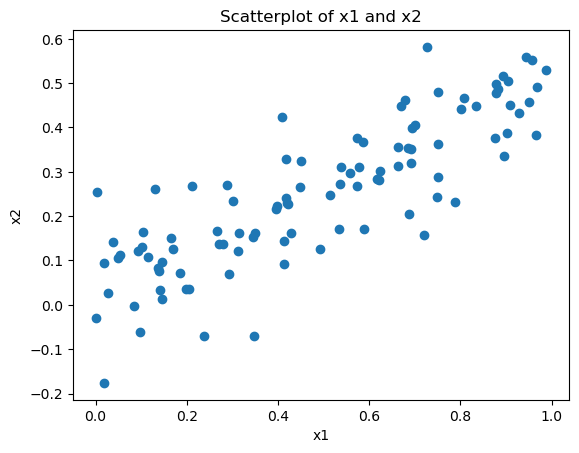

In [5]:
# creating a scatterplot to display the relationship between x1 and x2

plt.scatter(x1, x2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatterplot of x1 and x2")
plt.show()

In [6]:
# creating a matrix, X, of the x1 and x2 variables for modelling

X = sm.add_constant(np.column_stack((x1, x2)), has_constant='add') # using column_stack function to create matrix
X[:,0] = 2 # setting the value of the constant / intertcept term to 2 (as above)

In [14]:
model = sm.OLS(y, X).fit() # note different syntax because using sm not SMF

In [10]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1873.
Date:                Tue, 02 May 2023   Prob (F-statistic):           3.20e-78
Time:                        13:50:48   Log-Likelihood:                 87.919
No. Observations:                 100   AIC:                            -169.8
Df Residuals:                      97   BIC:                            -162.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0095      0.010    101.630      0.0

### Notes on interpretation

- The estimated coefficients vs the true coefficients are:
    - $\hat{β}0 = 1.0095$ vs $β0 = 2$
    - $\hat{β}1 = 1.8705$ vs $β1 = 2$
    - $\hat{β}2 = 0.5202$ vs $β2 = 0.3$
- Overall, the estimated coefficients aren't too far off the true coefficients
- We can reject the null hypothesis $\textit{H}_0 : β_1 = 0$ since the p-value for $β_1$ is 0.000 which signifies a low probability of obtaining a test statistic (t-value) as extreme as or more extreme than the one observed, assuming that the null hypothesis is true (e.g. that x1 has no effect on y) 
- Similarly, we can reject the null hypothesis $\textit{H}_0 : β_2 = 0$ because $β_2$ is also 0.000
